In [34]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [42]:
import csv

connection = sqlite3.connect("../db.sqlite3")
cursor = connection.cursor()

cursor.execute("""
SELECT restaurant_order.id, restaurant_order.datetime, restaurant_orderitem.quantity, restaurant_product.price, restaurant_product.name
FROM restaurant_order
LEFT JOIN restaurant_orderitem ON restaurant_order.id = restaurant_orderitem.order_id
LEFT JOIN restaurant_product ON restaurant_orderitem.product_id = restaurant_product.id;
""")

rows = cursor.fetchall()

with open("detailed_orders", "w", newline="") as file:
    csv_writer = csv.writer(file)
    csv_writer.writerow([i[0] for i in cursor.description])
    csv_writer.writerows(rows)

cursor.close()
connection.close()

df = pd.read_csv("detailed_orders", index_col="id")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74818 entries, 1 to 13397
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  74818 non-null  object 
 1   quantity  74818 non-null  int64  
 2   price     74818 non-null  float64
 3   name      74818 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 2.9+ MB


# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

<AxesSubplot: title={'center': '10 most popular products of the Menu'}>

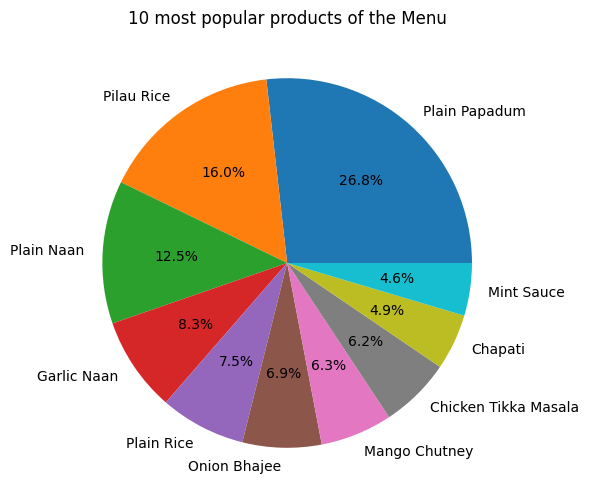

In [43]:
top_10_products = df.groupby("name").sum("quantity").sort_values(by="quantity", ascending=False).head(10)
top_10_products["quantity_percentage"] = (top_10_products["quantity"] * 100 / top_10_products["quantity"].sum()).round(1)
top_10_products["quantity_percentage"].plot.pie(title="10 most popular products of the Menu", figsize=(6,6), autopct='%.1f%%', ylabel="")

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

<AxesSubplot: title={'center': '10 most profitable products of the Menu'}>

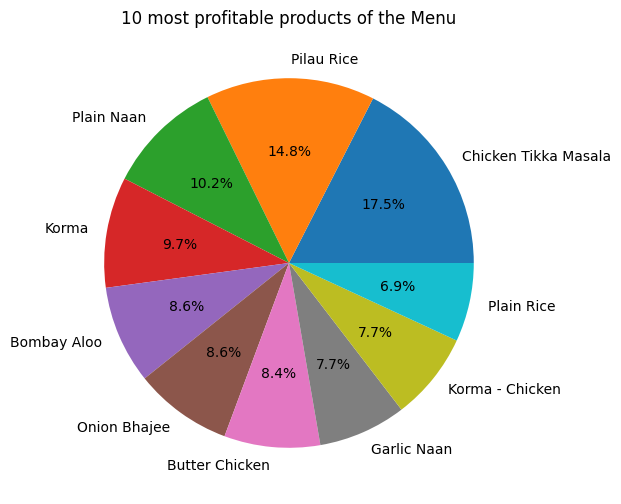

In [44]:
df["item_price"] = df["price"] * df["quantity"]
highest_income_products = df.groupby("name").sum("item_price").sort_values(by="item_price", ascending=False).head(10)
highest_income_products["item_price_percentage"] = (highest_income_products["item_price"] * 100 / highest_income_products["item_price"].sum()).round(1)
highest_income_products["item_price_percentage"].plot.pie(title="10 most profitable products of the Menu", figsize=(6,6), autopct='%.1f%%', ylabel="")

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

<AxesSubplot: xlabel='datetime'>

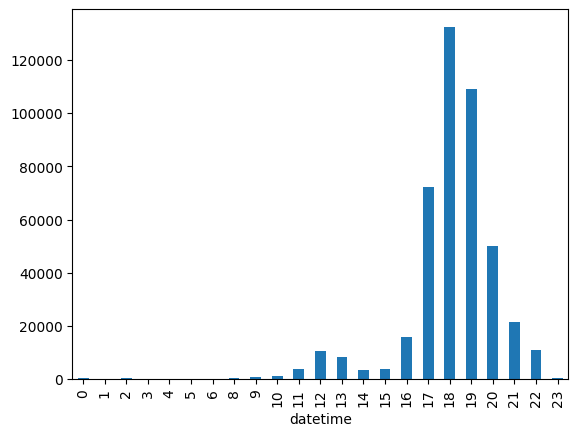

In [45]:
df["datetime"] = pd.to_datetime(df["datetime"])
hourly_income = df.groupby(df["datetime"].dt.hour).sum("item_price")
hourly_income["item_price"].plot.bar()

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

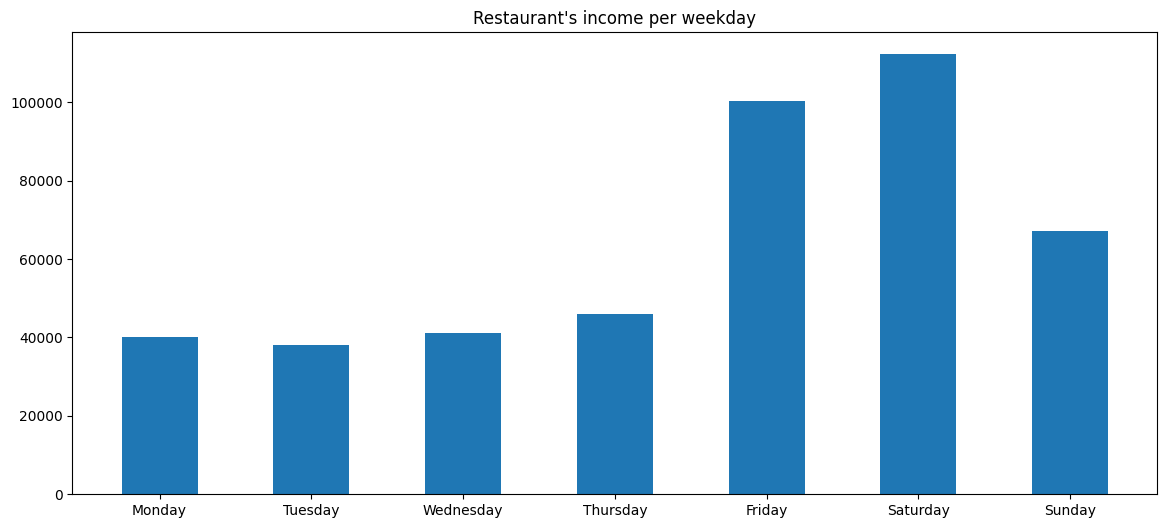

In [46]:
df["day_of_week"] = df["datetime"].apply(lambda x: x.weekday())
income_by_weekday = df.groupby("day_of_week").sum("item_price").sort_values(by="day_of_week")

values = income_by_weekday["item_price"]
labels =["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
plt.figure(figsize=(14, 6))
plt.bar(labels, values, width=0.5)
plt.title("Restaurant's income per weekday")
plt.show()